In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import TOFPET_cal_lib as TPcal

%matplotlib nbagg
%load_ext autoreload
%autoreload 2

# DATA SELECTION

In [ ]:
filename = "/home/viherbos/DATA_daq/CAL_data/calibration_tpulse_nocompressor_210713.h5"
channel = 63
tac     = 3
tpulse  = 359500
data = pd.read_hdf(filename,key='ch'+str(channel))
data = data[data['tac_id']==tac]
data_fit = data[data['delay']==tpulse]
#plt.figure()
#plt.plot((data['tfine']))
#delays = np.unique(data_tc['delay'].to_numpy())
#print(delays)

  # GAUSSIAN FITTING FOR SELECTED TFINE DATA

fig = plt.figure()
axis = fig.add_subplot(121)
axis2 = fig.add_subplot(122)

#data_sel = data[(data['tfine']>390) & (data['tfine']<407)]
rango_fit = np.max(data_fit['tfine'])-np.min(data_fit['tfine'])
#coeff,coeff_err,moda,sigma,chi=TPcal.semigauss_fit(data_fit['tfine'],rango_fit,True,axis2)

# Two distributions
#print(np.std(data_fit['tfine'].to_numpy()))
if  np.std(data_fit['tfine'].to_numpy())> 10 :
    
    # Fit Left   
    data_fit_sel = data_fit[data_fit['tfine']<(rango_fit/2.0 + np.min(data_fit['tfine']))]
    rango_fit_sel = np.max(data_fit_sel['tfine'])-np.min(data_fit_sel['tfine'])
    coeff_l,coeff_err_l,moda_l,sigma_l,chi_l = TPcal.semigauss_fit(data_fit_sel['tfine'],rango_fit_sel,True,axis)
    
    data_fit_sel = data_fit[data_fit['tfine']>(rango_fit/2.0 + np.min(data_fit['tfine']))]
    rango_fit_sel = np.max(data_fit_sel['tfine'])-np.min(data_fit_sel['tfine'])
    coeff_d,coeff_err_d,moda_d,sigma_d,chi_d = TPcal.semigauss_fit(data_fit_sel['tfine'],rango_fit_sel,True,axis2)
    
    
else:
    # Usual case
    print('3')
    coeff,coeff_err,moda,sigma,chi=TPcal.semigauss_fit(data_fit['tfine'],rango_fit,True,axis)
    coeff_l = coeff_d = coeff
    coeff_err_l = coeff_err_d =coeff_err
    moda_d = moda_l = moda
    sigma_d = sigma_l = sigma
    chi_d = chi_l = chi
    # Fit fails with narrow distribution
    if (sigma < 1.5) :
        print("Fit failure")
        print('4')
        coeff,coeff_err,chi=TPcal.gauss_fit(data_fit['tfine'],rango_fit,True,axis)
        moda = coeff[1]
        sigma = coeff[2]
        coeff_l = coeff_d = coeff
        coeff_err_l = coeff_err_d =coeff_err
        moda_d = moda_l = moda
        sigma_d = sigma_l = sigma
        chi_d = chi_l = chi
                    
print(i,ch,tc,moda_l,sigma_l,chi_l)
print(i,ch,tc,moda_d,sigma_d,chi_d)
#axis.plot(TPcal.semigauss(np.arange(0,410), 400, 3, -10,100))


In [ ]:
fig = plt.figure()
axis = fig.add_subplot(121)
axis2 = fig.add_subplot(122)

#data_sel = data[(data['tfine']>390) & (data['tfine']<407)]
rango_fit = np.max(data_fit['tfine'])-np.min(data_fit['tfine'])
coeff,coeff_err,moda,sigma,chi=TPcal.semigauss_fit(data_fit['tfine'],rango_fit,True,axis2)

In [ ]:
ASIC = 'asic0'

# GAUSSIAN FITTING FOR ALL TFINE DATA

In [145]:
filename = "/home/viherbos/DATA_daq/CAL_data/calibration_tpulse_nocompressor_210713.h5"  #ASIC + "_tdc_tpulse.h5"

channels = range(0,64)
tacs = range(0,4)
        
res=[]
for ch in channels:
    data_ch = pd.read_hdf(filename,key='ch'+str(ch))
    for tc in tacs:
        data_tc = data_ch[data_ch['tac_id']==tc]
        # Find delay arrays
        delays = np.unique(data_tc['delay'].to_numpy())
                
        for i in delays: #np.arange(0,360,0.5):
            data_fit = data_tc[data_tc['delay']==i]
            if data_fit.size > 0:

                rango_fit = np.max(data_fit['tfine'])-np.min(data_fit['tfine'])
                values,bins = np.histogram(data_fit['tfine'],rango_fit)
                peak = bins[np.argmax(values)]
                
                # Two distributions
                if  np.std(data_fit['tfine'].to_numpy())> 10 :
                
                        # Fit Left   
                    data_fit_sel = data_fit[data_fit['tfine']<(rango_fit/2.0 + np.min(data_fit['tfine']))]
                    rango_fit_sel = np.max(data_fit_sel['tfine'])-np.min(data_fit_sel['tfine'])
                    if (rango_fit_sel==0):
                        #Only one bin left
                        moda_l,sigma_l,chi_l = [np.min(data_fit_sel['tfine']),1,0]
                    else:    
                        coeff_l,coeff_err_l,moda_l,sigma_l,chi_l = TPcal.semigauss_fit(data_fit_sel['tfine'],rango_fit_sel,False)
                    
                    data_fit_sel = data_fit[data_fit['tfine']>(rango_fit/2.0 + np.min(data_fit['tfine']))]
                    rango_fit_sel = np.max(data_fit_sel['tfine'])-np.min(data_fit_sel['tfine'])
                    if (rango_fit_sel==0):
                        #Only one bin left
                        moda_d,sigma_d,chi_d = [np.min(data_fit_sel['tfine']),1,0]
                    else:
                        coeff_d,coeff_err_d,moda_d,sigma_d,chi_d = TPcal.semigauss_fit(data_fit_sel['tfine'],rango_fit_sel,False)
                    
                    # First mu and sigma are the most probable
                    if peak > (rango_fit/2.0 + np.min(data_fit['tfine'])):
                        a,b,c,d,e = coeff_l,coeff_err_l,moda_l,sigma_l,chi_l
                        coeff_l,coeff_err_l,moda_l,sigma_l,chi_l = coeff_d,coeff_err_d,moda_d,sigma_d,chi_d
                        coeff_d,coeff_err_d,moda_d,sigma_d,chi_d = a,b,c,d,e
                        
                
                else:
                    # Usual case
                    print('3')
                    coeff,coeff_err,moda,sigma,chi=TPcal.semigauss_fit(data_fit['tfine'],rango_fit,False) 
                    coeff_l = coeff_d = coeff
                    coeff_err_l = coeff_err_d =coeff_err
                    moda_d = moda_l = moda
                    sigma_d = sigma_l = sigma
                    chi_d = chi_l = chi
                    # Fit fails with narrow distribution
                    if (sigma < 1.5) :
                        print("Fit failure")
                        print('4')
                        coeff,coeff_err,chi=TPcal.gauss_fit(data_fit['tfine'],rango_fit,False)
                        moda = coeff[1]
                        sigma = coeff[2]
                        coeff_l = coeff_d = coeff
                        coeff_err_l = coeff_err_d = coeff_err
                        moda_d = moda_l = moda
                        sigma_d = sigma_l = sigma
                        chi_d = chi_l = chi
                        
                print(i,ch,tc,moda_l,sigma_l,chi_l,moda_d,sigma_d,chi_d)               
                res.append([ch,tc,i,moda_l,np.abs(sigma_l),moda_d,np.abs(sigma_d)])
                  
                    
df_tfine = pd.DataFrame(res,columns=['channel_id','tac_id','phase','mu','sigma','mu2','sigma2'])
        

3
0 0 0 372.1079999997846 2.0871365139904166 5.368575046932136 372.1079999997846 2.0871365139904166 5.368575046932136
3
10000 0 0 367.8139999998152 1.918908932895071 5.650982011281454 367.8139999998152 1.918908932895071 5.650982011281454
3
20000 0 0 364.483999999823 2.075880178992736 3.346839942068023 364.483999999823 2.075880178992736 3.346839942068023
3
30000 0 0 361.48599999979933 2.0010141454668187 1.0929405281837907 361.48599999979933 2.0010141454668187 1.0929405281837907
3
40000 0 0 353.5919999997732 2.1872040817150653 3.152414469041858 353.5919999997732 2.1872040817150653 3.152414469041858
3
50000 0 0 349.9579999998118 2.1087105354594295 2.2748589889852364 349.9579999998118 2.1087105354594295 2.2748589889852364
3
60000 0 0 346.3089999998035 2.1049451855106374 5.15684452712938 346.3089999998035 2.1049451855106374 5.15684452712938
3
70000 0 0 338.37999999980184 2.152020732102471 1.0043216321876907 338.37999999980184 2.152020732102471 1.0043216321876907
3
80000 0 0 334.848999999767

In [ ]:
storage = pd.HDFStore("/home/viherbos/DATA_daq/" + ASIC + "_tfine_fitted_210713.h5",'w',complib="zlib",complevel=4)
storage.put('tfine',df_tfine,index=False,format='table',data_columns=True)
storage.close()

# TDC CALIBRATION (Sawtooth procedure)

In [23]:
ASIC = "asic0"
channels = range(0,64) #[1,17,21,22,38,39,44,47]
tacs = range(0,4)
res=[]
data = pd.read_hdf("/home/viherbos/DATA_daq/" + ASIC + "_tfine_fitted_210713.h5",key='tfine')
data['phase'] = data['phase']/1000.0
for ch in channels:
    for tc in tacs:
        gb,coeff = TPcal.TDC_fit(data,ch,tc, plot=False)
        res.append([ch,tc,coeff[0],coeff[1],coeff[2],gb])
        print(coeff)


GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 0 / TAC = 0 / CHISQR_r = 0.330334
[-89.63408902 298.00000277 315.42700452]
GAP [[[298.5]
  [295. ]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 0 / TAC = 1 / CHISQR_r = 0.337921
[-89.3248331  298.05728529 299.41678281]
GAP [[[298.5]
  [293. ]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 0 / TAC = 2 / CHISQR_r = 0.345232
[-89.47141573 298.00000093 297.60937422]
GAP [[[298.5]
  [297. ]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or

Fitting Problems


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.coeff = np.array(self.guess)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.perr  = np.array(self.guess)


Channel = 0 / TAC = 3 / CHISQR_r = 0.368496
[-89.72740865 298.00000265 299.02754009]
GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 1 / TAC = 0 / CHISQR_r = 0.431252
[-82.57395808 298.00000314 312.69260321]
GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 1 / TAC = 1 / CHISQR_r = 0.493246
[-83.0780816  298.00000109 298.21955459]
GAP [[[298.5]
  [298.5]]

 [[301. ]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or

Channel = 1 / TAC = 2 / CHISQR_r = 0.532733
[-82.98598342 298.00000117 293.34097014]
GAP [[[298.5]
  [298.5]]

 [[300. ]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or

Channel = 1 / TAC = 3 / CHISQR_r = 0.403631
[-82.67121874 298.00000212 294.29325312]
GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Fitting Problems


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.coeff = np.array(self.guess)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.perr  = np.array(self.guess)


Fitting Problems
Channel = 2 / TAC = 0 / CHISQR_r = 0.348591
[-85.04258892 298.00000042 303.75119445]
GAP [[[298.5]
  [298.5]]

 [[301. ]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or

Channel = 2 / TAC = 1 / CHISQR_r = 0.406279
[-85.07996676 298.32519939 289.42635112]
GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


KeyboardInterrupt: 

In [135]:
df_tfine_cal = pd.DataFrame(res,columns=['channel_id','tac_id','amplitude','shift','offset','chi'])
storage = pd.HDFStore('/home/viherbos/DATA_daq/CAL_results/tfine_cal_asic0.h5','w',complib="zlib",complevel=4)
storage.put('tfine_cal',df_tfine_cal,index=False,format='table',data_columns=True)
storage.close()

In [132]:
df_tfine_cal[df_tfine_cal['chi']>1]
df_tfine_cal

,channel_id,tac_id,amplitude,shift,offset,chi
0,0,0,-89.634089,298.000003,315.427005,0.330334
1,0,1,-89.324833,298.057285,299.416783,0.337921
2,0,2,-89.471416,298.000001,297.609374,0.345232
3,0,3,-89.727409,298.000003,299.027540,0.368496
4,1,0,-82.573958,298.000003,312.692603,0.431252
...,...,...,...,...,...,...
251,62,3,-84.030353,353.232146,277.618041,0.323506
252,63,0,-87.010652,351.534093,318.848445,0.415844
253,63,1,-87.026146,351.591315,300.468735,0.295113
254,63,2,-86.407975,351.715506,300.294095,0.530019


GAP [[[341.5]
  [341.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 46 / TAC = 1 / CHISQR_r = 0.378696


<IPython.core.display.Javascript object>


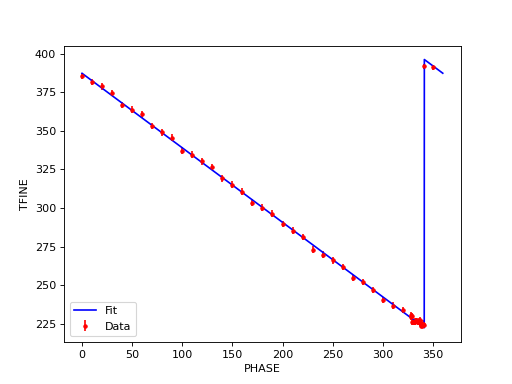

[-86.83466589 341.4863114  309.36606633]


<IPython.core.display.Javascript object>


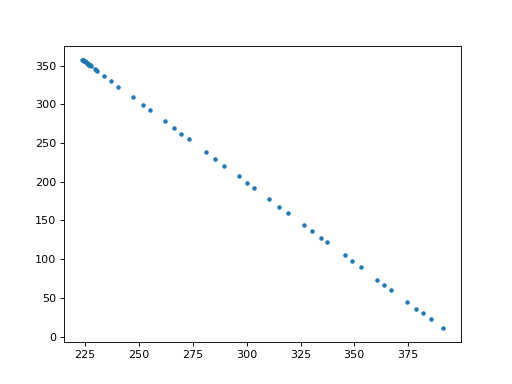

In [25]:
channel = 46
tac     = 1
ASIC = 'asic0'
data = pd.read_hdf("/home/viherbos/DATA_daq/" + ASIC + "_tfine_fitted_210713.h5",key='tfine')
data['phase']=data['phase']/1000.0

gb,coeff = TPcal.TDC_fit(data,channel,tac, plot=True)
print(coeff)

plt.figure()
y=TPcal.sawtooth_inv_corr(data[(data['tac_id']==tac)&(data['channel_id']==channel)]['mu'],*coeff)
plt.plot(data[(data['tac_id']==tac)&(data['channel_id']==channel)]['mu'],y,'.')
wp=TPcal.sawtooth_inv_corr(np.arange(200,400,0.01),*coeff)


# QDC CALIBRATION

# GAUSSIAN FITTING FOR EFINE DATA

In [51]:
asic = 2
filename = '/home/viherbos/DATA_daq/CAL_data/asic'+str(asic)+'_qdc_tpulse.h5'
#channels = range(0,64)
channels = [6,8,10,12,14,15,16,18,19,20,22,25,26,28,30,31]
tacs = range(0,4)
res=[]
for ch in channels:
    data_ch = pd.read_hdf(filename,key='ch'+str(ch))
    for tc in tacs:
        data_tc = data_ch[data_ch['tac_id']==tc]
        # Blind fit
        for i in np.arange(0,300,10):
            data_fit = data_tc[data_tc['tpulse']==i]
            data_fit = np.mod(data_fit['efine'] - 1024 + 14, 1024)
            # PETSYS Magic 
            
            coeff_err = [1000,1000,1000]
            bins = 1
            while ((np.abs(coeff_err[1]) > 1) & (bins < 30)) :
                bins = bins + 1 
                coeff,coeff_err,chisq_r=TPcal.gauss_fit(data_fit,bins,False) #True,axis,'Gauss Fit','','',[0.65,0.5,"left"])
                #print(ch,tc,i,bins,chisq_r)
                
            print(ch,tc,i,coeff[1],coeff_err[1])

            res.append([asic,ch,tc,i,coeff[1],np.abs(coeff[2])])

df_efine = pd.DataFrame(res,columns=['tofpet_id','channel_id','tac_id','tpulse','mu','sigma'])

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:215: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:215: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:215: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:215: RuntimeWarnin

Fitting Problems
6 0 0 0.0 0.0
Fitting Problems
6 0 10 0.0 0.0
Fitting Problems
6 0 20 0.0 0.0
Fitting Problems
6 0 30 0.0 0.0
Fitting Problems
6 0 40 8.59670923458844 0.0026620145829410057
Fitting Problems
6 0 50 64.14483072191653 0.04653683012787517
Fitting Problems
6 0 60 150.6192859907809 0.023529858344475057
Fitting Problems
6 0 70 221.53666740974356 0.010856454411840518
Fitting Problems
6 0 80 284.3567482162902 0.0026822704111603094
Fitting Problems
6 0 90 346.2710243675333 0.08438207285525007
Fitting Problems
6 0 100 407.49115672862865 0.0031613939407239048
Fitting Problems
6 0 110 469.48028946744904 0.16660895132251408
Fitting Problems
6 0 120 527.9100379469747 0.0026909753833618344
Fitting Problems
6 0 130 584.7821510971063 0.011199329743039147
Fitting Problems
6 0 140 634.7647458872184 0.02065718698954886
Fitting Problems
6 0 150 677.4868495322808 0.10971270180001357
Fitting Problems
6 0 160 707.1761916476216 0.14859670122383653
Fitting Problems
6 0 170 719.3705924127581 0.08

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

6 2 150 676.584272325553 0.08716164925582659
Fitting Problems
6 2 160 706.4276143483784 0.03206723023628591
Fitting Problems
6 2 170 719.2299228497174 0.009519788041526842
Fitting Problems
6 2 180 724.3579170116501 0.013102786016647345
Fitting Problems
6 2 190 725.5890810867102 0.014151835364602955
Fitting Problems
6 2 200 726.3677450259823 0.014426078172122535
Fitting Problems
6 2 210 726.2006279589248 0.019009245518517393
Fitting Problems
6 2 220 726.4768769361569 0.014483837256487438
Fitting Problems
6 2 230 726.685122873548 0.0038356478461511858
Fitting Problems
6 2 240 726.4144711407736 0.019248503719694027
Fitting Problems
6 2 250 725.8381689429893 0.011417992731782154
Fitting Problems
6 2 260 726.4492348387912 0.00661673743803115
Fitting Problems
6 2 270 727.0330049176335 0.023946018266575463
Fitting Problems
6 2 280 725.9526413822925 0.0014529599228024748
Fitting Problems
6 2 290 726.3472864977741 0.006914084314040436
Fitting Problems
6 3 0 0.0 0.0
Fitting Problems
6 3 10 0.0 0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

6 3 210 726.2037663487082 0.009309602769429154
Fitting Problems
6 3 220 726.4899174592562 0.013518197887512748
Fitting Problems
6 3 230 726.10192540355 0.0037793556232360638
Fitting Problems
6 3 240 726.3909910938833 0.014931544831650862
Fitting Problems
6 3 250 726.2579426655707 0.004330669282368796
Fitting Problems
6 3 260 726.4610260710675 0.007447903069471492
Fitting Problems
6 3 270 727.0154219328467 0.022884830065304635
Fitting Problems
6 3 280 725.9633790790015 0.002280537596692568
Fitting Problems
6 3 290 726.3475761191729 0.00934562870661798
Fitting Problems
8 0 0 0.0 0.0
Fitting Problems
8 0 10 0.0 0.0
Fitting Problems
8 0 20 0.0 0.0
Fitting Problems
8 0 30 0.0 0.0
Fitting Problems
8 0 40 24.56291375517015 0.03472478211460012
Fitting Problems
8 0 50 108.84668504054336 0.037254661777719335
Fitting Problems
8 0 60 191.1569206098362 0.0012004764248179573
Fitting Problems
8 0 70 259.39936234202816 0.08897987504008725
Fitting Problems
8 0 80 326.7012938448305 0.003916023709417012


/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

8 0 190 691.0952123693929 0.027100957288596475
Fitting Problems
8 0 200 690.9154268199181 0.0023381094632859037
Fitting Problems
8 0 210 690.658379011117 0.01883204719253883
Fitting Problems
8 0 220 691.2263794790302 0.017987817553291992
Fitting Problems
8 0 230 691.1441667585672 0.03171620006711259
Fitting Problems
8 0 240 691.2229859498191 0.05576983800480432
Fitting Problems
8 0 250 691.2386025277873 0.020054777312643074
Fitting Problems
8 0 260 691.4279873782945 0.004064036270612568
Fitting Problems
8 0 270 690.6827996130033 0.07977079230780275
Fitting Problems
8 0 280 691.3892550064571 0.003908127725931174
Fitting Problems
8 0 290 690.6262920816762 0.021320209126402017
Fitting Problems
8 1 0 0.0 0.0
Fitting Problems
8 1 10 0.0 0.0
Fitting Problems
8 1 20 0.0 0.0
Fitting Problems
8 1 30 0.0 0.0
Fitting Problems
8 1 40 24.43014435450922 0.029233198340661355
Fitting Problems
8 1 50 108.10011927621271 0.031422542665047834
Fitting Problems
8 1 60 190.79122440159594 0.02571002873769386


/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

8 1 240 691.1810803416245 0.027831425147165835
Fitting Problems
8 1 250 691.0391084481058 0.01894729334692728
Fitting Problems
8 1 260 691.2962484427563 0.012974138037833502
Fitting Problems
8 1 270 691.1195347734844 0.007288275885065057
Fitting Problems
8 1 280 691.2712715237906 0.013876265880104465
Fitting Problems
8 1 290 690.5045151216275 0.02157754591608778
Fitting Problems
8 2 0 0.0 0.0
Fitting Problems
8 2 10 0.0 0.0
Fitting Problems
8 2 20 0.0 0.0
Fitting Problems
8 2 30 0.0 0.0
Fitting Problems
8 2 40 23.674399085660134 0.057639838747534006
Fitting Problems
8 2 50 108.04949580975813 0.1440922354198057
Fitting Problems
8 2 60 189.98779879136168 0.0036623186277391973
Fitting Problems
8 2 70 258.65952823488215 0.018497412733938987
Fitting Problems
8 2 80 325.560697689594 0.017120838833035328
Fitting Problems
8 2 90 391.62062504967327 0.09822101761558832
Fitting Problems
8 2 100 456.4212480012837 0.005110019881216646
Fitting Problems
8 2 110 518.3996198204022 0.02180354789487661
F

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
8 3 0 0.0 0.0
Fitting Problems
8 3 10 0.0 0.0
Fitting Problems
8 3 20 0.0 0.0
Fitting Problems
8 3 30 0.0 0.0
Fitting Problems
8 3 40 22.58088820674094 0.15531232632986994
Fitting Problems
8 3 50 103.91784433586484 0.043359234664250505
Fitting Problems
8 3 60 187.29565006909843 0.016821865888067087
Fitting Problems
8 3 70 256.0869294652069 0.07678366270423903
Fitting Problems
8 3 80 322.8543342108428 0.2073723751862246
Fitting Problems
8 3 90 387.4956801939752 0.007114419084898337
Fitting Problems
8 3 100 452.04291946836423 0.001712125784481573
Fitting Problems
8 3 110 514.6209318300689 0.0636437591789368
Fitting Problems
8 3 120 571.3507647595958 0.012404122108670318
Fitting Problems
8 3 130 622.2401970238344 0.0019396663509978135
Fitting Problems
8 3 140 660.5095892048628 0.06070653921813616
Fitting Problems
8 3 150 680.7799704991072 0.08113522390538543
Fitting Problems
8 3 160 688.4041561971592 0.011210489148950776
Fitting Problems
8 3 170 689.3529589123568 0.019931

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:215: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:215: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:215: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:215: RuntimeWarnin

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:215: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:215: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:215: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:215: RuntimeWarnin

Fitting Problems
10 0 0 0.0 0.0
Fitting Problems
10 0 10 0.0 0.0
Fitting Problems
10 0 20 0.0 0.0
Fitting Problems
10 0 30 0.0 0.0
Fitting Problems
10 0 40 9.255838731541045 0.00372073112081091
Fitting Problems
10 0 50 76.77081195192126 0.04529140513956832
Fitting Problems
10 0 60 160.10817323378785 0.031163313589041407
Fitting Problems
10 0 70 226.39477603709608 0.010595595233279933
Fitting Problems
10 0 80 290.13082851998524 0.11616003380369896
Fitting Problems
10 0 90 350.95404453390563 0.028878954025202925
Fitting Problems
10 0 100 414.09096406247966 0.04404880434572299
Fitting Problems
10 0 110 474.0171392731161 0.08912677761326737
Fitting Problems
10 0 120 531.3400598749563 0.005114595137707731
Fitting Problems
10 0 130 583.2412176852652 0.016392356242640325
Fitting Problems
10 0 140 629.4540742368112 0.01908710773147521
Fitting Problems
10 0 150 663.4991127466088 0.014042154516034843
Fitting Problems
10 0 160 679.2580179800117 0.09091907801306609
Fitting Problems
10 0 170 686.65

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

10 1 90 351.20487485156605 0.20464720940640962
Fitting Problems
10 1 100 414.03742756126127 0.022964166356342967
Fitting Problems
10 1 110 473.52714988307133 0.0796324146641035
Fitting Problems
10 1 120 531.4793928765321 0.004475582848974371
Fitting Problems
10 1 130 583.1245794751653 0.06972922278495515
Fitting Problems
10 1 140 629.1621135866515 0.06169208088339327
Fitting Problems
10 1 150 663.4524795916586 0.052547740266358244
Fitting Problems
10 1 160 679.447912010602 0.00720174507596399
Fitting Problems
10 1 170 686.3058398741767 0.004277710927392877
Fitting Problems
10 1 180 688.2260166109769 0.019942034114955265
Fitting Problems
10 1 190 688.5181077971986 0.005700384369534732
Fitting Problems
10 1 200 689.1465388638602 0.01875999412152747
Fitting Problems
10 1 210 689.4775870504269 0.003792006436622888
Fitting Problems
10 1 220 689.5762192113726 0.0014074565231590394
Fitting Problems
10 1 230 689.0882904106703 0.03119079920685572
Fitting Problems
10 1 240 688.6264840154964 0.01

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

10 2 150 662.9970074845991 0.01327003429824987
Fitting Problems
10 2 160 678.6501223400637 0.010291409548011854
Fitting Problems
10 2 170 685.6250686255145 0.008496399527341568
Fitting Problems
10 2 180 688.1108680113305 0.021008907899174478
Fitting Problems
10 2 190 688.3910537131559 0.010970684087960867
Fitting Problems
10 2 200 689.0880283777278 5.227056567137207e-05
Fitting Problems
10 2 210 689.384294438455 0.005736850230607614
Fitting Problems
10 2 220 689.3655742398181 0.02127566578535356
Fitting Problems
10 2 230 688.4206953919344 0.02507430591891976
Fitting Problems
10 2 240 688.6299930347845 0.020886258745716684
Fitting Problems
10 2 250 689.2980476884994 0.006214493884270137
Fitting Problems
10 2 260 689.2725333644862 0.012865411449981231
Fitting Problems
10 2 270 688.5735702924075 0.06247934043889524
Fitting Problems
10 2 280 689.5400729427964 0.0025394496404919607
Fitting Problems
10 2 290 689.3076455228061 0.006844028570348245
Fitting Problems
10 3 0 0.0 0.0
Fitting Probl

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

10 3 200 689.2490963044745 0.008372699913170101
Fitting Problems
10 3 210 689.5924064774176 0.0010046907832167809
Fitting Problems
10 3 220 689.7110202983833 0.0003739461117903291
Fitting Problems
10 3 230 689.2011641707043 0.016765278881559854
Fitting Problems
10 3 240 689.3232599876941 0.008301053667240321
Fitting Problems
10 3 250 689.5447118222331 0.0012162157782788221
Fitting Problems
10 3 260 689.3900402703329 0.012760171349100072
Fitting Problems
10 3 270 689.2621083349957 0.018532488520168578
Fitting Problems
10 3 280 689.6650738907562 0.0037634856008315013
Fitting Problems
10 3 290 689.5965664982685 0.0025685954096282024
Fitting Problems
12 0 0 0.0 0.0
Fitting Problems
12 0 10 0.0 0.0
Fitting Problems
12 0 20 0.0 0.0
Fitting Problems
12 0 30 0.0 0.0
Fitting Problems
12 0 40 45.42038825059468 0.09820004315552829
Fitting Problems
12 0 50 148.51160792860162 0.011234899749103326
Fitting Problems
12 0 60 231.31538237857586 0.0045941059129457435
Fitting Problems
12 0 70 306.91645028

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

12 0 190 751.0991833717621 0.042684148461734135
Fitting Problems
12 0 200 750.6413050014387 0.023991334965648897
Fitting Problems
12 0 210 750.6016101049925 0.00033950119640551157
Fitting Problems
12 0 220 750.5380981848169 0.12382736771927232
Fitting Problems
12 0 230 750.1288452967918 0.05987103769755491
Fitting Problems
12 0 240 750.220653116835 0.041871963172467414
Fitting Problems
12 0 250 750.0191343398266 0.02481440715121936
Fitting Problems
Fitting Problems
12 0 260 750.3192312190532 0.07346512196955492
Fitting Problems
12 0 270 750.9495386161836 0.00022767421871456456
Fitting Problems
12 0 280 750.4833992158868 0.057274679923403245
Fitting Problems
12 0 290 750.2721133861342 0.06342916922037685
Fitting Problems
12 1 0 0.0 0.0
Fitting Problems
12 1 10 0.0 0.0
Fitting Problems
12 1 20 0.0 0.0
Fitting Problems
12 1 30 0.0 0.0
Fitting Problems
12 1 40 45.389948785081 0.0633108547802408
Fitting Problems
12 1 50 148.28599746137783 0.01254944793593902
Fitting Problems
12 1 60 230.795

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

12 1 240 750.3083843570354 0.002701903052737388
Fitting Problems
12 1 250 750.2967402664505 0.012190774797245953
Fitting Problems
12 1 260 749.7583444830485 0.023110695760137478
Fitting Problems
12 1 270 751.1051810058768 0.05460570703121578
Fitting Problems
12 1 280 750.2035660372633 0.052221825847435004
Fitting Problems
12 1 290 750.5022165768904 0.006018900415036326
Fitting Problems
12 2 0 0.0 0.0
Fitting Problems
12 2 10 0.0 0.0
Fitting Problems
12 2 20 0.0 0.0
Fitting Problems
12 2 30 0.0 0.0
Fitting Problems
12 2 40 44.456768939347754 0.07307821994651487
Fitting Problems
12 2 50 147.30209500926264 0.0159693130934402
Fitting Problems
12 2 60 230.2177726033675 0.014561117879026461
Fitting Problems
12 2 70 305.8573285102515 0.0045872466467335215
Fitting Problems
12 2 80 379.0140502147489 0.004119243924906653
Fitting Problems
12 2 90 450.65427648181816 0.001417255874329232
Fitting Problems
12 2 100 522.4424937547693 0.23407425179344538
Fitting Problems
12 2 110 590.6629624193125 0.08

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:215: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:215: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:12: R

Fitting Problems
12 3 0 0.0 0.0
Fitting Problems
12 3 10 0.0 0.0
Fitting Problems
12 3 20 0.0 0.0
Fitting Problems
12 3 30 0.0 0.0
Fitting Problems
12 3 40 42.7050348242746 0.03969125942824933
Fitting Problems
12 3 50 144.64549647128996 0.00684026572993397
Fitting Problems
12 3 60 227.64723970521496 0.02935197641964192
Fitting Problems
12 3 70 303.1581674188009 0.002496446144751564
Fitting Problems
12 3 80 376.28798744153806 0.026127684070001725
Fitting Problems
12 3 90 447.315597341546 0.02391984532933551
Fitting Problems
12 3 100 518.7626282052465 0.08896298737428288
Fitting Problems
12 3 110 586.3800595809174 0.011031810488934283
Fitting Problems
12 3 120 647.5498119463754 0.007041700317609283
Fitting Problems
12 3 130 698.7237555952518 0.10059413224786869
Fitting Problems
12 3 140 732.0752835261528 0.037088984187166545
Fitting Problems
12 3 150 745.1546243995892 0.017800942113789516
Fitting Problems
12 3 160 748.3868808448176 0.03902443972576356
Fitting Problems
12 3 170 749.552796

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:215: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:215: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:215: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:215: RuntimeWarnin

Fitting Problems
14 0 0 0.0 0.0
Fitting Problems
14 0 10 0.0 0.0
Fitting Problems
14 0 20 0.0 0.0
Fitting Problems
14 0 30 0.0 0.0
Fitting Problems
Fitting Problems
14 0 40 16.720434040796857 0.0023957550457721828
Fitting Problems
14 0 50 61.899009882541954 0.005709019426149816
Fitting Problems
14 0 60 138.1706234995349 0.016967555414957522
Fitting Problems
14 0 70 201.62188539962568 0.029523054775048973
Fitting Problems
14 0 80 257.24142913585365 0.011092368687387038
Fitting Problems
14 0 90 312.6648719402103 0.007306086185877128
Fitting Problems
14 0 100 366.8265361357697 0.0016847710218952396
Fitting Problems
14 0 110 420.09133828866186 0.16703642765829707
Fitting Problems
14 0 120 472.4011327537021 0.1598473813845526
Fitting Problems
14 0 130 520.8357491466938 0.023190408936770865
Fitting Problems
14 0 140 565.78685581906 0.08573353916680879
Fitting Problems
14 0 150 604.6629171383677 0.0002283930631263155
Fitting Problems
14 0 160 634.399143391296 0.007855386910060314
Fitting Prob

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

14 2 90 311.51120912019275 0.024901400707256677
Fitting Problems
14 2 100 366.08199234245143 0.01863545088186409
Fitting Problems
14 2 110 418.51278775933764 0.07573062012319248
Fitting Problems
14 2 120 471.01700826932637 0.0781698569553073
Fitting Problems
14 2 130 520.3624462126006 0.1542041888179126
Fitting Problems
14 2 140 564.8153428895947 0.03976876068999639
Fitting Problems
14 2 150 604.0245465857429 0.03321143548560588
Fitting Problems
14 2 160 634.040538321695 0.12768226647811093
Fitting Problems
14 2 170 650.7959408133192 0.000496007721892924
Fitting Problems
14 2 180 656.7105280441971 0.012964113667390828
Fitting Problems
14 2 190 658.5555340104413 0.007333707269844206
Fitting Problems
14 2 200 659.359215365542 0.01370056612016782
Fitting Problems
14 2 210 659.6358228307861 0.001959224502032208
Fitting Problems
14 2 220 659.6756445197755 0.0009639625653545446
Fitting Problems
14 2 230 659.3560562505131 0.0036443003917733395
Fitting Problems
14 2 240 659.571094975313 0.0046

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

14 3 140 561.6928006631737 0.08672590056205656
Fitting Problems
14 3 150 601.3157339305359 0.010648770614535293
Fitting Problems
14 3 160 631.6306606936153 0.04939296862636056
Fitting Problems
14 3 170 650.0369301735443 0.00893115882933257
Fitting Problems
14 3 180 656.6760760400231 0.030734522947348058
Fitting Problems
14 3 190 659.3318436564743 0.010784566163864556
Fitting Problems
14 3 200 659.6693311313019 0.00219028642294856
Fitting Problems
14 3 210 659.4875206147461 0.0047746274091951335
Fitting Problems
14 3 220 660.0278073009231 0.004034557029251111
Fitting Problems
14 3 230 659.7134314647783 0.001197481718542536
Fitting Problems
14 3 240 660.0680135620753 0.0008778518476958323
Fitting Problems
14 3 250 660.1529476016464 0.0024727828721830512
Fitting Problems
14 3 260 659.5443135417598 0.0037292645761909057
Fitting Problems
14 3 270 659.6753435599854 0.008037504388809414
Fitting Problems
14 3 280 659.4545762222241 0.0019329590419174167
Fitting Problems
14 3 290 659.39218365248

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

15 0 170 707.4410202571027 0.07816669721452803
Fitting Problems
15 0 180 723.91554061346 0.1365906208438303
Fitting Problems
15 0 190 730.7707306164232 0.016001933356178513
Fitting Problems
15 0 200 733.3642676986292 0.021199040308387852
Fitting Problems
15 0 210 733.6813996042837 0.009793644432286775
Fitting Problems
15 0 220 733.911860288127 0.034456643136975856
Fitting Problems
15 0 230 734.3375068450007 0.012229434074494526
Fitting Problems
15 0 240 734.3367238429099 0.0038284539244922027
Fitting Problems
15 0 250 734.3336988300397 0.0325555910208504
Fitting Problems
15 0 260 734.6732466084052 0.008370829066778171
Fitting Problems
15 0 270 734.1654489225524 0.015187939268169864
Fitting Problems
15 0 280 734.7277497661041 0.004247198604684888
Fitting Problems
15 0 290 734.4306624224239 0.005477116124907501
Fitting Problems
15 1 0 0.0 0.0
Fitting Problems
15 1 10 0.0 0.0
Fitting Problems
15 1 20 0.0 0.0
Fitting Problems
15 1 30 0.0 0.0
Fitting Problems
15 1 40 0.0 0.0
Fitting Problem

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

15 1 260 733.9350900705563 0.014455324894164208
Fitting Problems
15 1 270 733.9345262503275 0.04181113790660199
Fitting Problems
15 1 280 734.6029472809921 0.0009108520722587632
Fitting Problems
15 1 290 733.7592047841372 0.02328943202555156
Fitting Problems
15 2 0 0.0 0.0
Fitting Problems
15 2 10 0.0 0.0
Fitting Problems
15 2 20 0.0 0.0
Fitting Problems
15 2 30 0.0 0.0
Fitting Problems
15 2 40 0.0 0.0
Fitting Problems
15 2 50 29.695669629107908 0.0009212549451876744
Fitting Problems
15 2 60 103.84245824835064 0.03564831881697136
Fitting Problems
15 2 70 185.52160455968945 0.03964921779457353
Fitting Problems
15 2 80 248.380273063038 0.011561730173171398
Fitting Problems
15 2 90 307.2733673139794 0.03685060811253514
Fitting Problems
15 2 100 365.68901707260136 0.03336719704982394
Fitting Problems
15 2 110 423.6704325307929 0.04572843387251905
Fitting Problems
15 2 120 481.33702556933446 0.006547989242256993
Fitting Problems
15 2 130 536.3107662308882 0.03872736534108433
Fitting Problem

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

15 3 40 0.0 0.0
Fitting Problems
15 3 50 27.94479406632895 0.0005640891893417179
Fitting Problems
15 3 60 100.36786809274894 0.07230254543933774
Fitting Problems
15 3 70 182.708489128615 0.01732140097741319
Fitting Problems
15 3 80 245.33944485720505 0.021361169047675363
Fitting Problems
15 3 90 303.79049075090165 0.018742161054542312
Fitting Problems
15 3 100 361.42481015654204 0.01895503604941026
Fitting Problems
15 3 110 419.36186457662035 0.032863332350056534
Fitting Problems
15 3 120 477.0910644600997 0.008633085146377539
Fitting Problems
15 3 130 532.1738653010278 0.006295972289198623
Fitting Problems
15 3 140 583.1875050355728 0.02611310188282727
Fitting Problems
15 3 150 631.6761714203693 0.09141095011872387
Fitting Problems
15 3 160 672.2708271902258 0.04414582573582231
Fitting Problems
15 3 170 704.2738822545907 0.007459763234702084
Fitting Problems
15 3 180 721.9163306850648 0.023196338042951615
Fitting Problems
15 3 190 730.4075990694777 0.017352659649634075
Fitting Problem

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

16 0 30 0.0 0.0
Fitting Problems
16 0 40 0.0 0.0
Fitting Problems
16 0 50 35.767256797294785 0.015797338864706828
Fitting Problems
16 0 60 103.1065442048297 0.1064646879143083
Fitting Problems
16 0 70 179.96390539081253 0.004087278857847158
Fitting Problems
16 0 80 243.38853509710881 0.00899966858380962
Fitting Problems
16 0 90 302.0137434647766 0.06354636995921148
Fitting Problems
16 0 100 358.93157026294995 0.04256600509720284
Fitting Problems
16 0 110 416.15692083633877 0.10987518355276639
Fitting Problems
16 0 120 471.62243127377525 0.07785269820406336
Fitting Problems
16 0 130 525.6827375133205 0.037529469382425094
Fitting Problems
Fitting Problems
16 0 140 579.0812463694363 0.011212527270752459
Fitting Problems
16 0 150 628.0312058272015 0.24371897581980562
Fitting Problems
16 0 160 672.4777084707836 0.03167381891550668
Fitting Problems
16 0 170 706.3142694295564 0.019745962073861853
Fitting Problems
16 0 180 728.5089702895493 0.04156391054226533
Fitting Problems
16 0 190 738.505

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

1 80 243.73730993605736 0.008141831986288987
Fitting Problems
16 1 90 301.4170815301547 0.059803932933235784
Fitting Problems
16 1 100 359.3049679937674 0.1546056215091397
Fitting Problems
16 1 110 415.39330857448687 0.05351399577459335
Fitting Problems
16 1 120 470.99134759516795 0.009402701444478362
Fitting Problems
16 1 130 525.9773718495991 0.024387981180116716
Fitting Problems
16 1 140 578.4084072410313 0.03509820730720858
Fitting Problems
16 1 150 627.5572202768863 0.013273141772969727
Fitting Problems
16 1 160 671.5610558957039 0.02989218820852446
Fitting Problems
16 1 170 706.0373866787031 0.010504360115755836
Fitting Problems
16 1 180 728.3153249514849 0.12423360603685285
Fitting Problems
16 1 190 737.8146539414059 0.005920544991621118
Fitting Problems
16 1 200 741.3718431119178 0.005655282361527585
Fitting Problems
16 1 210 743.2273811790304 0.008099697106207641
Fitting Problems
16 1 220 743.3124301298527 0.02815422714771494
Fitting Problems
16 1 230 743.4700605226329 0.00617

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

16 2 180 728.1643428546016 0.17546729850949996
Fitting Problems
16 2 190 737.6623584001642 0.0018998568682431576
Fitting Problems
16 2 200 741.2233664240354 0.011841392223823433
Fitting Problems
16 2 210 742.5687635441269 0.06277500200632144
Fitting Problems
16 2 220 743.3407663797963 0.021536241694177997
Fitting Problems
16 2 230 743.5521087340795 0.010166164382811859
Fitting Problems
16 2 240 744.4847517130806 0.03069190726403186
Fitting Problems
16 2 250 744.5901905529017 0.054516343878110496
Fitting Problems
16 2 260 744.8985767004081 0.0027918647103130764
Fitting Problems
16 2 270 744.9316152912912 0.004503137584070036
Fitting Problems
16 2 280 744.5337823520684 0.03368534295751575
Fitting Problems
16 2 290 745.1026949564384 0.0018041517779740334
Fitting Problems
16 3 0 0.0 0.0
Fitting Problems
16 3 10 0.0 0.0
Fitting Problems
16 3 20 0.0 0.0
Fitting Problems
16 3 30 0.0 0.0
Fitting Problems
16 3 40 0.0 0.0
Fitting Problems
16 3 50 34.161209710970525 0.16061755648204792
Fitting Pr

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

16 3 230 743.2631469181222 0.0021486718080299715
Fitting Problems
16 3 240 744.5669723378453 0.021272091810142835
Fitting Problems
16 3 250 745.1634105247354 0.033418619685317764
Fitting Problems
16 3 260 744.5343209377432 0.055264398924106756
Fitting Problems
16 3 270 745.1610806858451 0.005091579914992223
Fitting Problems
16 3 280 745.1304245525604 0.024752003948539957
Fitting Problems
16 3 290 745.1592716090332 0.04208957581599487
Fitting Problems
18 0 0 0.0 0.0
Fitting Problems
18 0 10 0.0 0.0
Fitting Problems
18 0 20 0.0 0.0
Fitting Problems
18 0 30 0.0 0.0
Fitting Problems
18 0 40 0.0 0.0
Fitting Problems
18 0 50 30.025336624246872 0.07423404863043376
Fitting Problems
18 0 60 103.50911795142625 0.08881704952866572
Fitting Problems
18 0 70 187.0261696579344 0.0011580479190278692
Fitting Problems
18 0 80 252.15857891969554 0.02987117043813487
Fitting Problems
18 0 90 312.9452524804981 0.0009112629769781051
Fitting Problems
18 0 100 372.708110980839 0.05641273546476145
Fitting Probl

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

18 0 240 750.4541845153794 0.03461874383667143
Fitting Problems
Fitting Problems
18 0 250 750.6160834265459 0.05893210865894247
Fitting Problems
18 0 260 751.6107594618547 0.001807909685886561
Fitting Problems
18 0 270 750.6382681131256 0.007460565873770856
Fitting Problems
18 0 280 750.693338787331 0.0042687956402093314
Fitting Problems
18 0 290 749.8712258271248 0.0051240108247405545
Fitting Problems
18 1 0 0.0 0.0
Fitting Problems
18 1 10 0.0 0.0
Fitting Problems
18 1 20 0.0 0.0
Fitting Problems
18 1 30 0.0 0.0
Fitting Problems
18 1 40 0.0 0.0
Fitting Problems
18 1 50 30.30932122708904 0.10887278981990287
Fitting Problems
18 1 60 102.88445115130499 0.042351767620647345
Fitting Problems
18 1 70 186.21157471355914 0.007366494164383047
Fitting Problems
18 1 80 251.3692691335122 0.025181902965001165
Fitting Problems
18 1 90 312.1062298436396 0.07732447828154394
Fitting Problems
18 1 100 372.2931601624019 0.10958740798383469
Fitting Problems
18 1 110 431.0088318582315 0.00603691869625516

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
18 2 0 0.0 0.0
Fitting Problems
18 2 10 0.0 0.0
Fitting Problems
18 2 20 0.0 0.0
Fitting Problems
18 2 30 0.0 0.0
Fitting Problems
18 2 40 0.0 0.0
Fitting Problems
18 2 50 29.320343154386837 0.045598944944201664
Fitting Problems
18 2 60 101.6214069286523 0.05557328373251729
Fitting Problems
18 2 70 185.17364988213086 0.014707793443152555
Fitting Problems
18 2 80 250.58266808665758 0.02761418840301943
Fitting Problems
18 2 90 311.24506542682826 0.026138943237710287
Fitting Problems
18 2 100 371.59953083027796 0.11531102357326561
Fitting Problems
18 2 110 430.4886165541193 0.00397492406182662
Fitting Problems
18 2 120 488.2302527440169 0.0028365004374702467
Fitting Problems
18 2 130 544.6951588705492 0.007614089746687336
Fitting Problems
18 2 140 599.272625500431 0.008139352453836284
Fitting Problems
18 2 150 647.7399310705382 0.02827902213196279
Fitting Problems
18 2 160 691.602790354058 0.10968507539054358
Fitting Problems
18 2 170 722.9251463882129 0.01214361323647557

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

18 3 120 484.6261526659147 0.0056758450154944205
Fitting Problems
18 3 130 540.369796009971 0.016256946997762763
Fitting Problems
18 3 140 594.2015214451911 0.01818931697003224
Fitting Problems
18 3 150 643.8233868575967 0.0960614537221049
Fitting Problems
18 3 160 687.857745094438 0.053964803111265044
Fitting Problems
18 3 170 720.6481212421229 0.006880418169684379
Fitting Problems
18 3 180 739.2465831951441 0.06308751005103334
Fitting Problems
18 3 190 746.5258547720654 0.011578466430956292
Fitting Problems
18 3 200 748.4050784154383 0.007460629016438456
Fitting Problems
18 3 210 749.5524786646646 0.0008591887202781542
Fitting Problems
18 3 220 749.344894439776 0.055331860682849954
Fitting Problems
18 3 230 750.2869186976118 0.012081042107824508
Fitting Problems
18 3 240 749.857428188358 0.006840282404649833
Fitting Problems
18 3 250 750.5218134448057 0.010808232609814365
Fitting Problems
18 3 260 750.5628847007108 0.025625144103200104
Fitting Problems
18 3 270 749.4954057269526 0.02

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

19 0 110 439.2696204080005 0.07817496988196043
Fitting Problems
19 0 120 497.9136506684793 0.061526221708419655
Fitting Problems
19 0 130 556.0204554336042 0.015585236243311545
Fitting Problems
19 0 140 609.8734765749039 0.027243429086898658
Fitting Problems
19 0 150 658.622740019681 0.06010589395039501
Fitting Problems
19 0 160 700.3487069578928 0.036772875336981675
Fitting Problems
19 0 170 731.4739402165225 0.031964008356021256
Fitting Problems
19 0 180 749.3105429887376 0.07531178278208812
Fitting Problems
19 0 190 756.1946164004512 0.001075440168398301
Fitting Problems
19 0 200 758.4355168315124 0.0033308639965870623
Fitting Problems
19 0 210 759.4157758841985 0.053194001765520506
Fitting Problems
19 0 220 760.344671011191 0.007144709425599823
Fitting Problems
19 0 230 759.8764613429316 0.03546702876105542
Fitting Problems
19 0 240 759.4483629687437 0.054400681673221735
Fitting Problems
19 0 250 759.4991327044129 0.06875752571607138
Fitting Problems
19 0 260 760.0964845983873 0.02

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

 0.0035482755744206977
Fitting Problems
19 1 200 758.2646128586523 0.009843794406222645
Fitting Problems
19 1 210 759.125486789522 0.02541504809024181
Fitting Problems
19 1 220 760.1828296761307 0.03147564191603518
Fitting Problems
19 1 230 759.6474017787616 0.0478949353690351
Fitting Problems
19 1 240 759.7392247095422 0.01015076793119268
Fitting Problems
19 1 250 759.7225696017375 0.005314817294119951
Fitting Problems
19 1 260 759.3948259355344 0.03404469772703
Fitting Problems
19 1 270 759.8098787693574 0.004086430467511121
Fitting Problems
19 1 280 760.1352891297728 0.026666365224756884
Fitting Problems
19 1 290 760.6329464294088 0.002364861933732643
Fitting Problems
19 2 0 0.0 0.0
Fitting Problems
19 2 10 0.0 0.0
Fitting Problems
19 2 20 0.0 0.0
Fitting Problems
19 2 30 0.0 0.0
Fitting Problems
19 2 40 0.0 0.0
Fitting Problems
19 2 50 32.421383808366556 0.061390377251869924
Fitting Problems
19 2 60 104.92374954606277 0.0018465128086734657
Fitting Problems
19 2 70 190.1733514852162

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

19 2 260 760.1337437258974 0.024622955876782433
Fitting Problems
19 2 270 760.0752457448576 0.0009672323257800958
Fitting Problems
19 2 280 759.8031529334379 0.0684485550963578
Fitting Problems
19 2 290 760.7609497987578 0.0012259776682729039
Fitting Problems
19 3 0 0.0 0.0
Fitting Problems
19 3 10 0.0 0.0
Fitting Problems
19 3 20 0.0 0.0
Fitting Problems
19 3 30 0.0 0.0
Fitting Problems
19 3 40 0.0 0.0
Fitting Problems
19 3 50 30.28796253528185 0.13552940432977617
Fitting Problems
19 3 60 101.88892263221793 0.028358320830826896
Fitting Problems
19 3 70 186.55854263363062 0.0063368865195799935
Fitting Problems
19 3 80 253.07921461549043 0.019553251300497287
Fitting Problems
19 3 90 314.5169693384062 0.042532321181373546
Fitting Problems
19 3 100 373.60423523738615 0.06031642216936987
Fitting Problems
19 3 110 433.8439073338399 0.034782482266204076
Fitting Problems
19 3 120 492.8481422494029 0.05075786304209287
Fitting Problems
19 3 130 550.8453817265068 0.061972348465484876
Fitting Pro

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:215: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:215: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:215: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:215: RuntimeWarnin

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:215: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:215: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:215: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:215: RuntimeWarnin

Fitting Problems
20 0 0 0.0 0.0
Fitting Problems
20 0 10 0.0 0.0
Fitting Problems
20 0 20 0.0 0.0
Fitting Problems
20 0 30 0.0 0.0
Fitting Problems
20 0 40 11.215400458082305 0.0007169138382861121
Fitting Problems
20 0 50 73.19757588400519 0.008277237026021358
Fitting Problems
20 0 60 149.20572830012964 0.000576757756468267
Fitting Problems
20 0 70 209.90902638140625 0.0064083058181442585
Fitting Problems
20 0 80 267.6021566457012 0.020625840692746752
Fitting Problems
20 0 90 324.1985683238653 0.03333967241752127
Fitting Problems
20 0 100 380.9285289256613 0.024162942689946114
Fitting Problems
20 0 110 436.02696012728524 0.003329172363668803
Fitting Problems
20 0 120 488.3103284664372 0.035667703288564875
Fitting Problems
20 0 130 536.1834850624778 0.03909148316882392
Fitting Problems
20 0 140 577.2430189723949 0.03938971087895413
Fitting Problems
20 0 150 607.1278142136879 0.12877717067564332
Fitting Problems
20 0 160 621.2327860199949 0.005771288250584339
Fitting Problems
20 0 170 62

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:215: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:215: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:12: R

20 0 290 627.329575371444 0.0007453618042117461
Fitting Problems
20 1 0 0.0 0.0
Fitting Problems
20 1 10 0.0 0.0
Fitting Problems
20 1 20 0.0 0.0
Fitting Problems
20 1 30 0.0 0.0
Fitting Problems
20 1 40 11.198174835399794 1.9781177688026306e-05
Fitting Problems
20 1 50 73.11161204113003 0.003695645622288216
Fitting Problems
20 1 60 149.591364393327 0.08147797630698689
Fitting Problems
20 1 70 210.07102190051896 0.00036488993041092595
Fitting Problems
20 1 80 267.3798101117312 0.01635505118291715
Fitting Problems
20 1 90 324.7287050554343 0.009776049629374265
Fitting Problems
20 1 100 381.3016681997016 0.12136447397155022
Fitting Problems
20 1 110 436.4153256779136 0.09406568276207385
Fitting Problems
20 1 120 488.43347338990924 0.11290160990566178
Fitting Problems
20 1 130 536.019944124044 0.036930944848483055
Fitting Problems
20 1 140 576.9998323974471 0.023243841245955518
Fitting Problems
20 1 150 606.2516597197659 0.004265709800495492
Fitting Problems
20 1 160 620.5164689429065 0.0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

20 3 110 432.06430615218267 0.07045493661624759
Fitting Problems
20 3 120 484.16320433751565 0.14923312775937939
Fitting Problems
20 3 130 531.8063908285253 0.029513973768678783
Fitting Problems
20 3 140 573.3786265713127 0.03945309781991534
Fitting Problems
20 3 150 604.4268136146865 0.07311799673472101
Fitting Problems
20 3 160 619.5568316199162 0.014643924653989612
Fitting Problems
20 3 170 625.6966958991084 0.00032788043801021166
Fitting Problems
20 3 180 627.2839068028575 0.0031277121075921235
Fitting Problems
20 3 190 627.4517943295685 0.001632889428730008
Fitting Problems
20 3 200 627.1423776234525 0.0004509079205233819
Fitting Problems
20 3 210 627.4231814116963 0.0018324765831859771
Fitting Problems
20 3 220 628.1803081967252 0.004507744729539826
Fitting Problems
20 3 230 627.381432119615 0.0035845174877528053
Fitting Problems
20 3 240 627.6852521141195 0.0031954120862689663
Fitting Problems
20 3 250 627.203472987059 0.00011577442943302607
Fitting Problems
20 3 260 627.3355525

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

22 0 110 467.8499881178272 0.08242727907608688
Fitting Problems
22 0 120 523.2187827374728 0.012189282263599164
Fitting Problems
22 0 130 576.0137735453958 0.01449491631550699
Fitting Problems
22 0 140 622.6564245732396 0.015230455797097054
Fitting Problems
22 0 150 656.9889818087067 0.0031410247849849825
Fitting Problems
22 0 160 674.9364278832509 0.000322725869663344
Fitting Problems
22 0 170 681.6872467224862 0.0024618068402876845
Fitting Problems
22 0 180 683.3315910714529 0.00038760783235732563
Fitting Problems
22 0 190 683.7746785504862 0.00031737851697561964
Fitting Problems
22 0 200 683.4019199200093 0.00804148397522404
Fitting Problems
22 0 210 683.9140518733975 0.00011184126106103127
Fitting Problems
22 0 220 683.7463720019633 0.0008615783744193487
Fitting Problems
22 0 230 683.8291184035339 0.0005644684771854142
Fitting Problems
22 0 240 683.7782764353742 0.0009331985768585798
Fitting Problems
22 0 250 683.6840461909486 0.0010023943794260405
Fitting Problems
22 0 260 684.095

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

22 1 190 683.6533010423789 0.0013246559235090452
Fitting Problems
22 1 200 683.2642927146082 0.0011568873862161985
Fitting Problems
22 1 210 683.8045816028828 0.00023816136859367785
Fitting Problems
22 1 220 683.7740974355743 2.85696335909745e-05
Fitting Problems
22 1 230 683.3974283014079 0.0013370800145939175
Fitting Problems
22 1 240 683.8169502493165 8.05260219846965e-05
Fitting Problems
22 1 250 683.5633078840019 0.0022218251999535222
Fitting Problems
22 1 260 684.0588352968206 0.0002599332078988131
Fitting Problems
22 1 270 684.2177592027668 0.00030219740105562397
Fitting Problems
22 1 280 684.0609079876477 0.00011606297261936095
Fitting Problems
22 1 290 683.7283904738167 0.0016088820782548612
Fitting Problems
22 2 0 0.0 0.0
Fitting Problems
22 2 10 0.0 0.0
Fitting Problems
22 2 20 0.0 0.0
Fitting Problems
22 2 30 0.0 0.0
Fitting Problems
22 2 40 13.8858539630719 6.63129711945358e-05
Fitting Problems
22 2 50 74.65530786446652 0.00912284176552879
Fitting Problems
22 2 60 158.4350

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

22 2 270 684.1010098700034 0.0006165347789377772
Fitting Problems
22 2 280 683.7916892540923 0.0009605341545093245
Fitting Problems
22 2 290 683.6036638135577 0.0009641743742660566
Fitting Problems
22 3 0 0.0 0.0
Fitting Problems
22 3 10 0.0 0.0
Fitting Problems
22 3 20 0.0 0.0
Fitting Problems
22 3 30 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
22 3 40 13.077557990607657 13.077557990607657
Fitting Problems
22 3 50 72.08358072437194 0.004357154765857892
Fitting Problems
22 3 60 154.94552102597535 0.0027692383915556684
Fitting Problems
22 3 70 221.6760604440723 0.00822164961962108
Fitting Problems
22 3 80 284.2542819686526 0.0069924646726675435
Fitting Problems


/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:215: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:215: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:12: R

22 3 90 344.1579004559139 0.012961594516825827
Fitting Problems
22 3 100 403.9787562640464 0.02419742313041726
Fitting Problems
22 3 110 462.75662687644166 0.08723907976354917
Fitting Problems
22 3 120 518.9972687101199 0.15871033655516306
Fitting Problems
22 3 130 571.5128849645649 0.14833891375060784
Fitting Problems
22 3 140 618.4061218679474 0.18323405224248218
Fitting Problems
22 3 150 654.5666867873143 0.002480205991278316
Fitting Problems
22 3 160 673.286403366268 0.0008646053983450031
Fitting Problems
22 3 170 681.304895590483 0.011772890797358167
Fitting Problems
22 3 180 683.1512402878552 0.014489000351971607
Fitting Problems
22 3 190 683.8226291300992 2.312547525919749e-06
Fitting Problems
22 3 200 683.809043725086 0.00011726626882428072
Fitting Problems
22 3 210 683.4868774421598 0.005425702824148044
Fitting Problems
22 3 220 683.4635851198468 0.0035703497133649197
Fitting Problems
22 3 230 683.942393144836 0.0009863244857229126
Fitting Problems
22 3 240 683.9777184359308 4

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

25 0 110 560.7557256125658 0.07582938439638763
Fitting Problems
25 0 120 614.1855765931305 0.011583653212468964
Fitting Problems
25 0 130 651.2510631927382 0.0026212800846820185
Fitting Problems
25 0 140 670.1624498302202 0.009087330488224955
Fitting Problems
25 0 150 675.9876290672178 0.028730424482904898
Fitting Problems
25 0 160 678.2161139799069 0.1502263629672605
Fitting Problems
25 0 170 678.3968438618774 0.011802359913948983
Fitting Problems
25 0 180 678.293163969761 0.013499715401144679
Fitting Problems
25 0 190 678.3044457712143 0.11552833079705142
Fitting Problems
25 0 200 679.2710541255902 0.1772456990830226
Fitting Problems
25 0 210 677.7997991998132 0.011104100776838858
Fitting Problems
25 0 220 678.9300322361535 0.022865800452505865
Fitting Problems
25 0 230 677.7775301238314 0.010571014297203042
Fitting Problems
25 0 240 679.266391137323 0.1729267766023449
Fitting Problems
Fitting Problems
25 0 250 678.1175817172413 0.02630209272517046
Fitting Problems
25 0 260 678.10623

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

25 1 160 678.0504217584703 0.04019668860253051
Fitting Problems
25 1 170 677.9830359558605 0.012078585934044954
Fitting Problems
25 1 180 677.878955191251 0.012240937066062762
Fitting Problems
25 1 190 678.1498695236738 0.10730826566198295
Fitting Problems
25 1 200 678.6042186209507 0.03193285698042517
Fitting Problems
25 1 210 677.4019730581755 0.005053874419864757
Fitting Problems
25 1 220 679.3129759446708 0.000327600646497025
Fitting Problems
25 1 230 678.1766752552223 0.13017085584395013
Fitting Problems
25 1 240 678.4133960871503 0.0054189104094403695
Fitting Problems
25 1 250 677.7626714246536 0.00768467382974822
Fitting Problems
25 1 260 677.1018891818027 0.015579632218538027
Fitting Problems
25 1 270 678.3162667941459 0.10271490713101283
Fitting Problems
25 1 280 678.8470724169117 0.08310665987551373
Fitting Problems
25 1 290 677.298467898999 0.04242482565050302
Fitting Problems
25 2 0 0.0 0.0
Fitting Problems
25 2 10 0.0 0.0
Fitting Problems
25 2 20 0.0 0.0
Fitting Problems
2

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
25 2 180 678.2183814062221 0.017888181702896955
Fitting Problems
25 2 190 678.2794568905817 0.1269519083940495
Fitting Problems
25 2 200 679.2232177760019 0.1889965353299457
Fitting Problems
25 2 210 677.7064051562882 0.0067641851365298645
Fitting Problems
25 2 220 678.8707340907364 0.020719408253424065
Fitting Problems
25 2 230 678.2922897203603 0.14815413925505563
Fitting Problems
25 2 240 678.8538939395042 0.050233455169531246
Fitting Problems
25 2 250 678.5431523513687 0.07886687988223515
Fitting Problems
25 2 260 678.0360466746392 0.03639669174830474
Fitting Problems
25 2 270 678.4637940146291 0.03541742029084942
Fitting Problems
25 2 280 678.4092685698664 0.02076358391219188
Fitting Problems
25 2 290 678.1532672857546 0.12048972233512012
Fitting Problems
25 3 0 0.0 0.0
Fitting Problems
25 3 10 0.0 0.0
Fitting Problems
25 3 20 0.0 0.0
Fitting Problems
25 3 30 0.0 0.0
Fitting Problems
25 3 40 53.17829311225715 0.0959131351214483
Fitting Problems
25 3 50 145.9110712

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

25 3 210 677.7094639979307 0.0060169300316049905
Fitting Problems
25 3 220 678.8811791717698 0.019081422614133974
Fitting Problems
25 3 230 677.6563876421393 0.011774282104280229
Fitting Problems
25 3 240 679.3663772684095 0.012921655414887264
Fitting Problems
25 3 250 678.4462098986921 0.04421826522741662
Fitting Problems
25 3 260 677.3621780203723 0.0026964178022970435
Fitting Problems
25 3 270 677.9823498172103 0.02253563860212264
Fitting Problems
25 3 280 679.0167617683575 0.043623604062297344
Fitting Problems
25 3 290 678.1246390845928 0.1034175232228938
Fitting Problems
26 0 0 0.0 0.0
Fitting Problems
26 0 10 0.0 0.0
Fitting Problems
26 0 20 0.0 0.0
Fitting Problems
26 0 30 0.0 0.0
Fitting Problems
26 0 40 9.83317073836643 0.0024981865057806694
Fitting Problems
26 0 50 54.57505059127527 0.02555826515929304
Fitting Problems
26 0 60 138.1836107883666 0.03331323869627451
Fitting Problems
26 0 70 213.9448113851063 0.05137700375425097
Fitting Problems
26 0 80 275.3508120272249 0.04034

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

26 0 200 705.9602630113468 0.03154908111182308
Fitting Problems
26 0 210 705.703239893067 0.0548032630550256
Fitting Problems
26 0 220 706.1488449034745 0.02184646797029868
Fitting Problems
26 0 230 706.1362840932121 0.05062737252442129
Fitting Problems
26 0 240 707.3213794058985 0.0475495185267848
Fitting Problems
26 0 250 706.1928800275524 0.028439769286184902
Fitting Problems
26 0 260 706.2298435172132 0.03786318317113298
Fitting Problems
26 0 270 705.9504711729425 0.03302348548969497
Fitting Problems
26 0 280 706.1254371161571 0.024857143440832494
Fitting Problems
26 0 290 706.0450890336426 0.022152799843925135
Fitting Problems
26 1 0 0.0 0.0
Fitting Problems
26 1 10 0.0 0.0
Fitting Problems
26 1 20 0.0 0.0
Fitting Problems
26 1 30 0.0 0.0
Fitting Problems
26 1 40 10.43832077106827 0.0024432343217477763
Fitting Problems
26 1 50 54.26224816632204 0.002949960709401135
Fitting Problems
26 1 60 137.96312955772206 0.06771563895580382
Fitting Problems
26 1 70 213.9318840157386 0.06847074

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

26 1 270 705.5254894922286 0.023370858136128495
Fitting Problems
26 1 280 706.2285791816755 0.032833511056776704
Fitting Problems
26 1 290 705.8422004727262 0.0274255002943487
Fitting Problems
26 2 0 0.0 0.0
Fitting Problems
26 2 10 0.0 0.0
Fitting Problems
26 2 20 0.0 0.0
Fitting Problems
26 2 30 0.0 0.0
Fitting Problems
26 2 40 9.658426913468116 0.010720797573013571
Fitting Problems
26 2 50 53.80803439962082 0.01948727820011459
Fitting Problems
26 2 60 137.4080085139157 0.010754437530813909
Fitting Problems
26 2 70 213.75217121428082 0.033618261275165824
Fitting Problems
26 2 80 274.7680943272056 0.07958974148175593
Fitting Problems
26 2 90 333.4238542664958 0.20756529193099585
Fitting Problems
26 2 100 391.290859575286 0.005716529579267368
Fitting Problems
26 2 110 448.4754681628597 0.049133876826505114
Fitting Problems
26 2 120 504.99485620697976 0.038086642208495884
Fitting Problems
26 2 130 557.1013952790407 0.01627367127059854
Fitting Problems
26 2 140 606.3724982962581 0.028995

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:215: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:215: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:215: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:215: RuntimeWarnin

26 3 70 210.29921365486726 0.005552569618847613
Fitting Problems
26 3 80 271.7178651612561 0.06286994125157548
Fitting Problems
26 3 90 330.02503009841865 0.05131204114691528
Fitting Problems
26 3 100 388.2857374634054 0.009501907144608912
Fitting Problems
26 3 110 444.9606872795103 0.11672045532400824
Fitting Problems
26 3 120 501.21889752732204 0.02957948703539051
Fitting Problems
26 3 130 553.1602744660362 0.004477052069517553
Fitting Problems
26 3 140 602.8170455932309 0.003965928381693456
Fitting Problems
26 3 150 645.7858778633472 0.05603963054378879
Fitting Problems
26 3 160 677.6107574359773 0.033914532782293505
Fitting Problems
26 3 170 695.5686248080879 0.0452638262552427
Fitting Problems
26 3 180 703.2888412007313 0.1675424552997896
Fitting Problems
26 3 190 706.1502110460623 0.07290408876489698
Fitting Problems
26 3 200 705.9009338097507 0.028224998301587954
Fitting Problems
26 3 210 705.7395701947951 0.03934796655150608
Fitting Problems
26 3 220 706.0396105844248 0.0031611

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

28 0 80 259.48114865081413 0.10371010744748282
Fitting Problems
28 0 90 319.6431565005046 0.06111801629786693
Fitting Problems
28 0 100 378.4241079195466 0.020827326786644958
Fitting Problems
28 0 110 438.1803881567967 0.00578095994911656
Fitting Problems
28 0 120 495.46849161486745 0.03372297458092262
Fitting Problems
28 0 130 550.1334708066796 0.021687164141388965
Fitting Problems
28 0 140 601.3678921079173 0.012526991111139855
Fitting Problems
28 0 150 648.6232455013637 0.1841688016928755
Fitting Problems
28 0 160 685.4300638415192 0.00501974756150572
Fitting Problems
28 0 170 709.1985428459408 0.11761731093253124
Fitting Problems
28 0 180 720.1641444442953 0.030780396350930998
Fitting Problems
28 0 190 723.4106293130495 0.019440963808174738
Fitting Problems
28 0 200 724.3830972087787 0.01202752916746747
Fitting Problems
28 0 210 724.729466420572 0.000582912989324695
Fitting Problems
28 0 220 724.3743694246224 0.012548115512232215
Fitting Problems
28 0 230 725.08082840785 0.02705877

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

28 1 120 495.0063979849575 0.035765021496246295
Fitting Problems
28 1 130 549.9228127793075 0.06364142730057534
Fitting Problems
28 1 140 600.9430186772336 0.0031302971812174154
Fitting Problems
28 1 150 647.6416546820801 0.03438529801414467
Fitting Problems
28 1 160 685.1493659283375 0.018120679018961954
Fitting Problems
28 1 170 709.3060212205716 0.0425675008939061
Fitting Problems
28 1 180 719.2172106521192 0.03254469352139378
Fitting Problems
28 1 190 722.7041587941231 0.1131767521878581
Fitting Problems
28 1 200 723.2408041747273 0.00037200499995656205
Fitting Problems
28 1 210 724.3881129976373 0.00810613721547973
Fitting Problems
28 1 220 723.407638352901 0.00023941599722230176
Fitting Problems
28 1 230 724.7092278314228 0.015370302413666038
Fitting Problems
28 1 240 724.1367460927271 0.022110216297513974
Fitting Problems
28 1 250 724.0301712474478 0.009322472328037564
Fitting Problems
28 1 260 724.2172413934856 0.010553527333866764
Fitting Problems
28 1 270 723.6408182391106 0.

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

28 2 180 719.510203158924 0.05522923745665764
Fitting Problems
28 2 190 723.0511185939924 0.02229147732796974
Fitting Problems
28 2 200 724.4423842394186 0.009074649096286186
Fitting Problems
28 2 210 724.2747835808228 0.007902667640485752
Fitting Problems
28 2 220 724.4688024125323 0.0032056912465594674
Fitting Problems
28 2 230 725.1715498615057 0.027154226422451407
Fitting Problems
28 2 240 724.4001330544085 0.003730223349816727
Fitting Problems
28 2 250 724.2980321694486 0.01801279550557446
Fitting Problems
28 2 260 724.55307421515 0.006473153834697072
Fitting Problems
28 2 270 724.5633711710033 0.004108229077066161
Fitting Problems
28 2 280 724.8170080097412 0.0007967419397117763
Fitting Problems
28 2 290 724.8265160953559 0.02472862441898814
Fitting Problems
28 3 0 0.0 0.0
Fitting Problems
28 3 10 0.0 0.0
Fitting Problems
28 3 20 0.0 0.0
Fitting Problems
28 3 30 0.0 0.0
Fitting Problems
28 3 40 3.151944176928354 0.0022440993157464514
Fitting Problems
28 3 50 43.20336000750321 0.0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
28 3 250 724.8754665945031 0.014081348874738933
Fitting Problems
28 3 260 724.670935888379 0.0021668015000121774
Fitting Problems
28 3 270 724.5843253738843 0.003691958306559354
Fitting Problems
28 3 280 724.2386118900296 0.01053437244418931
Fitting Problems
28 3 290 724.8385343640696 0.019576168291162686
Fitting Problems
30 0 0 0.0 0.0
Fitting Problems
30 0 10 0.0 0.0
Fitting Problems
30 0 20 0.0 0.0
Fitting Problems
30 0 30 0.0 0.0
Fitting Problems
30 0 40 0.0 0.0
Fitting Problems
30 0 50 39.219484189420335 0.03320685571839082
Fitting Problems
30 0 60 110.5903189466735 0.003965480349217186
Fitting Problems
30 0 70 179.49681968458756 0.15420737860967554
Fitting Problems
30 0 80 238.41543284303359 0.02302755777400734
Fitting Problems
30 0 90 294.9308128189552 0.017056770661087628
Fitting Problems
30 0 100 350.3218041107739 0.11837848088332971
Fitting Problems
30 0 110 406.47073471934664 0.07297841597377175
Fitting Problems
30 0 120 460.87195202796323 0.0126305878322409

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:215: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:215: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:12: R

30 0 240 714.5341095456706 0.0020273814146823214
Fitting Problems
30 0 250 714.2847095880664 0.05457503834491466
Fitting Problems
30 0 260 714.8694121440275 2.712286869608361e-05
Fitting Problems
30 0 270 714.5135334343627 0.0003550780144715861
Fitting Problems
30 0 280 714.5357126711033 0.0003907912805340423
Fitting Problems
30 0 290 714.4719903470992 0.001619781147086303
Fitting Problems
30 1 0 0.0 0.0
Fitting Problems
30 1 10 0.0 0.0
Fitting Problems
30 1 20 0.0 0.0
Fitting Problems
30 1 30 0.0 0.0
Fitting Problems
30 1 40 0.0 0.0
Fitting Problems
30 1 50 38.930667786283664 0.08568150883438481
Fitting Problems
30 1 60 110.6886519468647 0.017728846995361272
Fitting Problems
30 1 70 179.1750250601595 0.03639216468607815
Fitting Problems
30 1 80 237.50610833584253 0.029367899471556737
Fitting Problems
30 1 90 294.6563310769375 0.021021805650933957
Fitting Problems
30 1 100 350.33122797781834 0.012127586450240117
Fitting Problems
30 1 110 406.3813493417306 0.1788455277967268
Fitting Pro

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:

30 1 290 713.6783518413506 0.003922739252007092
Fitting Problems
30 2 0 0.0 0.0
Fitting Problems
30 2 10 0.0 0.0
Fitting Problems
30 2 20 0.0 0.0
Fitting Problems
30 2 30 0.0 0.0
Fitting Problems
30 2 40 0.0 0.0
Fitting Problems
30 2 50 38.43953152925963 0.09269357159550448
Fitting Problems
30 2 60 110.23250743317735 0.0003959577471618044
Fitting Problems
30 2 70 178.67849717299333 0.017525050238404633
Fitting Problems
30 2 80 237.75987783847444 0.0024484702428787903
Fitting Problems
30 2 90 294.11299349174834 0.021204652303903792
Fitting Problems
30 2 100 349.22794417674373 0.04411855850654573
Fitting Problems
30 2 110 405.5261363724473 0.11359608743575933
Fitting Problems
30 2 120 460.4197074780461 0.1482556682555398
Fitting Problems
30 2 130 514.2329715486798 0.03147517697083914
Fitting Problems
30 2 140 564.9268373821343 0.006818624082342953
Fitting Problems
30 2 150 612.1905770271459 0.1334792817483761
Fitting Problems
30 2 160 652.4072580464134 0.027165677498177682
Fitting Proble

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

30 3 90 290.9051883844643 0.023940659018673673
Fitting Problems
30 3 100 346.01801002052423 0.04946955914816225
Fitting Problems
30 3 110 401.4490882664311 0.058808499278250714
Fitting Problems
30 3 120 456.62904073641414 0.13363054251280318
Fitting Problems
30 3 130 510.55025294925304 0.09435962697289074
Fitting Problems
30 3 140 560.7472844682327 0.08909920204927835
Fitting Problems
30 3 150 607.8767077418728 0.030195503969718557
Fitting Problems
30 3 160 648.8429932796925 0.04576281079752191
Fitting Problems
30 3 170 681.3502493533853 0.010291363737735735
Fitting Problems
30 3 180 701.3226325695788 0.05781739726549949
Fitting Problems
30 3 190 710.0918580568498 0.00031840377961214777
Fitting Problems
30 3 200 712.7361611291311 0.016021014698249417
Fitting Problems
30 3 210 713.2454482622563 0.051694953200822465
Fitting Problems
30 3 220 713.5067876607195 0.007501791135644185
Fitting Problems
30 3 230 714.1458793040327 0.000705366574420489
Fitting Problems
30 3 240 714.3648361838542 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

31 0 90 397.7643226202871 0.1361015340228433
Fitting Problems
31 0 100 464.5336153249159 0.037740930203880724
Fitting Problems
31 0 110 529.7008746152289 0.1471103838661049
Fitting Problems
31 0 120 591.7640286673526 0.04047412694699077
Fitting Problems
31 0 130 647.2269422092627 0.05417765332253106
Fitting Problems
31 0 140 694.3303196675024 0.02982987178944662
Fitting Problems
31 0 150 725.4948738279883 0.029769990701158298
Fitting Problems
31 0 160 738.1224626465308 0.01900866607185329
Fitting Problems
31 0 170 743.7006239474679 0.0001222911575010942
Fitting Problems
31 0 180 744.6414316512571 0.06083248106682887
Fitting Problems
31 0 190 744.6724311187918 0.05250703256187727
Fitting Problems
31 0 200 745.5407385210863 0.0002678858645690437
Fitting Problems
31 0 210 745.1012700523862 5.800171917324454e-05
Fitting Problems
31 0 220 745.2893999675124 0.009379517250104037
Fitting Problems
31 0 230 745.1631500174703 0.0009614173263778228
Fitting Problems
31 0 240 745.1177152158602 0.000

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

31 1 130 647.4797996384407 0.07995326403173432
Fitting Problems
31 1 140 694.4922528210119 0.06392858649090125
Fitting Problems
31 1 150 725.2414825118661 0.045817314086821034
Fitting Problems
31 1 160 738.0328868828739 0.00876230832169511
Fitting Problems
31 1 170 743.3146194924773 0.0024500865593301818
Fitting Problems
31 1 180 744.7844405565522 0.0077344017772488245
Fitting Problems
31 1 190 744.7693538717162 0.0029879332648411533
Fitting Problems
31 1 200 745.2477070748747 0.005083242627008344
Fitting Problems
31 1 210 744.7222168727176 0.0019712077468680396
Fitting Problems
31 1 220 744.5382541557849 0.029090333321761367
Fitting Problems
31 1 230 744.7667313647485 0.00040346188452713115
Fitting Problems
31 1 240 744.6789978464378 0.0007277868335550505
Fitting Problems
31 1 250 744.540192183254 0.0023048064670078477
Fitting Problems
31 1 260 745.2892667311038 0.0010067779668590487
Fitting Problems
31 1 270 744.7592937612856 0.014325728306582701
Fitting Problems
31 1 280 744.8230066

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

31 2 190 744.6903719626957 0.03573669524646542
Fitting Problems
31 2 200 745.6028063881452 0.00033227887917956046
Fitting Problems
31 2 210 744.6379141352222 0.012255246557012158
Fitting Problems
31 2 220 745.3440938234605 0.009583523437193339
Fitting Problems
31 2 230 744.6093075217108 0.011969306399467586
Fitting Problems
31 2 240 744.6232251142717 0.03361748122116589
Fitting Problems
31 2 250 744.9574547446372 0.00014731024266443957
Fitting Problems
31 2 260 745.5533523323589 0.0035546226535606447
Fitting Problems
31 2 270 744.6674110974352 0.046468391164723295
Fitting Problems
31 2 280 744.6152431163451 0.08938851854964618
Fitting Problems
31 2 290 745.0769071458607 0.0010863811950997365
Fitting Problems
31 3 0 0.0 0.0
Fitting Problems
31 3 10 0.0 0.0
Fitting Problems
31 3 20 0.0 0.0
Fitting Problems
31 3 30 0.0 0.0
Fitting Problems
31 3 40 19.9370906421548 0.04565207799515492
Fitting Problems
31 3 50 93.3409035169303 0.0459259921078395
Fitting Problems
31 3 60 185.58429413243996 0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

31 3 240 745.1491953809317 0.0013562740959407414
Fitting Problems
31 3 250 744.9438025005519 9.382292276884319e-05
Fitting Problems
31 3 260 745.5021556919563 0.005048786913896206
Fitting Problems
31 3 270 744.6504423681888 0.04815185434022845
Fitting Problems
31 3 280 744.7204448648531 0.0356029889231007
Fitting Problems
31 3 290 745.5611758926948 0.0011159786516817503


/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


In [52]:
storage = pd.HDFStore('/home/viherbos/DATA_daq/CAL_results/asic'+str(asic)+'_efine_fitted.h5','w',complib="zlib",complevel=4)
storage.put('efine',df_efine,index=False,format='table',data_columns=True)
storage.close()

In [53]:
filename = '/home/viherbos/DATA_daq/CAL_results/asic'+str(asic)+'_efine_fitted.h5'
#channels = range(0,63)
channels = [6,8,10,12,14,15,16,18,19,20,22,25,26,28,30,31]
tacs = range(0,4)
res=[]
for ch in channels:
    data_ch = pd.read_hdf(filename,key='efine')
    for tc in tacs:
        data_tc = data_ch[data_ch['tac_id']==tc]
        spl_conf = TPcal.QDC_inter_sp(data_tc,ch,tc,plot=False)
        res.append([asic,ch,tc,*spl_conf])

df_qfine = pd.DataFrame(res,columns=['tofpet_id','channel_id','tac_id','spl0','spl1','spl2','spl3',
                                     'spl4','spl5','spl6','spl7','spl8','spl9'])

In [54]:
storage = pd.HDFStore('/home/viherbos/DATA_daq/CAL_results/asic'+str(asic)+'_efine_cal_spl.h5','w',complib="zlib",complevel=4)
storage.put('efine',df_qfine,index=False,format='table',data_columns=True)
storage.close()

# THRESHOLD T1

In [3]:
filename = "/home/viherbos/DATA_daq/CAL_data/asic0_t1_lsb58_baseline30.h5"
with pd.HDFStore(filename) as hdf:
    channels = hdf.keys()
    print(channels)

['/data']


<IPython.core.display.Javascript object>


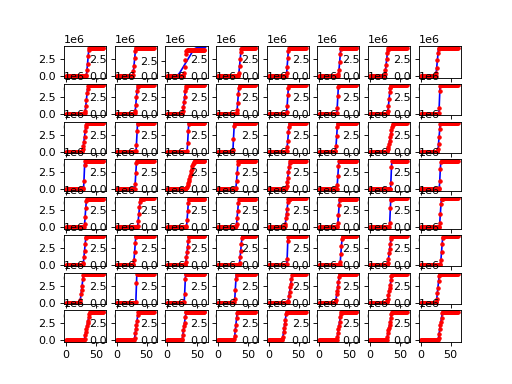

Channel = 0 / CHISQR = 105478981.537049
25
Channel = 1 / CHISQR = 295957668.620353
19
Channel = 2 / CHISQR = 493097513696.747559
18
Channel = 3 / CHISQR = 72838055.634599
25
Channel = 4 / CHISQR = 244743456.941088
21
Channel = 5 / CHISQR = 31645106.543288
23
Channel = 6 / CHISQR = 181161349.336148
17
Channel = 7 / CHISQR = 230501719.034429
18
Channel = 8 / CHISQR = 367724326.067032
23
Channel = 9 / CHISQR = 173051905.510559
23
Channel = 10 / CHISQR = 292246611.629223
17
Channel = 11 / CHISQR = 177180550.303071
22
Channel = 12 / CHISQR = 235522854.928801
23
Channel = 13 / CHISQR = 9829333.751118
20
Channel = 14 / CHISQR = 201270135.096733
22
Channel = 15 / CHISQR = 2332506.269955
23
Channel = 16 / CHISQR = 409890591.109380
19
Channel = 17 / CHISQR = 4046750.631308
23
Channel = 18 / CHISQR = 1794770.170192
27
Channel = 19 / CHISQR = 6293536.030156
18
Channel = 20 / CHISQR = 197012889.371982
22
Channel = 21 / CHISQR = 9705591.530669
18
Channel = 22 / CHISQR = 160087692.086634
20
Channel =

In [5]:
data = pd.read_hdf(filename,key='data')
thr = 'vth_t1'

fig, axs = plt.subplots(8,8)
res = []

for i in range(0,8):
    for j in range(0,8):
        if data[data['channel_id']==i*8+j].size == 0:
            pass
        else: 
            sol,fit=TPcal.Tn_fit(data,i*8+j,thr,min_count=1,plot=True,axis=axs[i,j])
            print(sol)
            res.append([i*8+j,sol,fit.coeff[0],fit.coeff[2]])

df_thr1 = pd.DataFrame(res,columns=['channel_id','thr_t1','slope','mu'])

In [ ]:
data = pd.read_hdf(filename,key='data')
thr = 'vth_t1'
fig, axs = plt.subplots(1)
sol=TPcal.Tn_fit(data,49,'vth_t1',min_count=1,plot=True,axis=axs)
#axs.plot(np.arange(0,62),TPcal.saturation(np.arange(0,62),18,3.6,34,2E6))
print(sol)

# THRESHOLD T2

In [28]:
filename = "/home/viherbos/DATA_daq/CAL_data/thr_asic0_t2_lsb58_baseline30_49v.h5"
with pd.HDFStore(filename) as hdf:
    channels = hdf.keys()
    print(channels)

['/data']


<IPython.core.display.Javascript object>


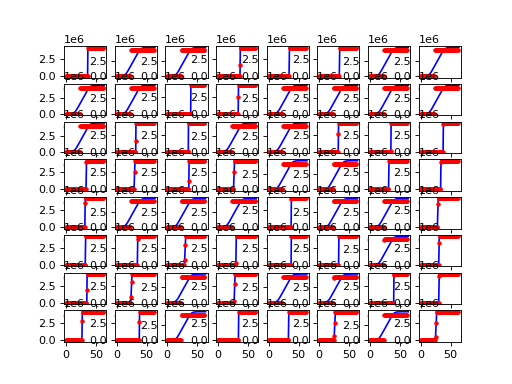

Channel = 0 / CHISQR = 18420.744220
33
Channel = 1 / CHISQR = 738664307612.426025
23
Channel = 2 / CHISQR = 738692184289.161621
23
Channel = 3 / CHISQR = 4937.737737
31
Channel = 4 / CHISQR = 1073.483632
28
Channel = 5 / CHISQR = 1799.099369
25
Channel = 6 / CHISQR = 738670890373.237671
23
Channel = 7 / CHISQR = 738696965500.576538
23
Channel = 8 / CHISQR = 738692142561.049072
23
Channel = 9 / CHISQR = 738693077221.068115
23
Channel = 10 / CHISQR = 512.724329
37
Channel = 11 / CHISQR = 1420.608990
23
Channel = 12 / CHISQR = 738699354868.156250
23
Channel = 13 / CHISQR = 738667633185.918945
23
Channel = 14 / CHISQR = 738665909718.095337
23
Channel = 15 / CHISQR = 738722902217.422485
23
Channel = 16 / CHISQR = 738706424658.151855
23
Channel = 17 / CHISQR = 2492.789404
26
Channel = 18 / CHISQR = 1866.277931
29
Channel = 19 / CHISQR = 738703713398.502930
23
Channel = 20 / CHISQR = 738656764881.542603
23
Channel = 21 / CHISQR = 2317.329529
25
Channel = 22 / CHISQR = 1845.615367
29
Channel =

In [8]:
data = pd.read_hdf(filename,key='data')
thr = 'vth_t1'

fig, axs = plt.subplots(8,8)
res = []

for i in range(0,8):
    for j in range(0,8):
        if data[data['channel_id']==i*8+j].size == 0:
            pass
        else: 
            sol,fit=TPcal.Tn_fit(data,i*8+j,thr,min_count=1,plot=True,axis=axs[i,j])
            print(sol)
            res.append([i*8+j,sol,fit.coeff[0],fit.coeff[2]])
        
df_thr2 = pd.DataFrame(res,columns=['channel_id','thr_t2','slope','mu'])

<IPython.core.display.Javascript object>


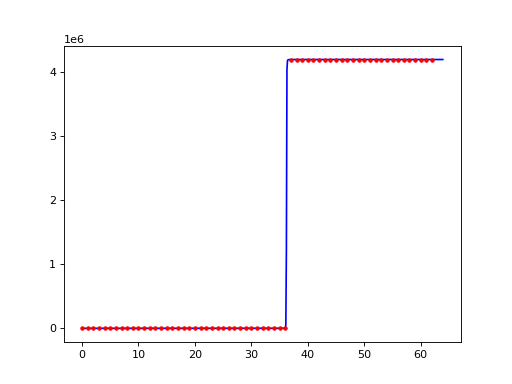

Channel = 0 / CHISQR = 18420.744220
(33, <TOFPET_cal_lib.fitting_nohist object at 0x7f0560c4f8e0>)


In [29]:
data = pd.read_hdf(filename,key='data')
thr = 'vth_t1'
fig, axs = plt.subplots(1)
sol=TPcal.Tn_fit(data,0,'vth_t1',min_count=1,plot=True,axis=axs)
#axs.plot(np.arange(0,62),TPcal.saturation(np.arange(0,62),18,3.6,34,2E6))
print(sol)

In [ ]:
storage = pd.HDFStore('/home/viherbos/DATA_daq/CAL_results/asic0_thresholds_cal_49v.h5','w',complib="zlib",complevel=4)
storage.put('thr1',df_thr1,index=False,format='table',data_columns=True)
storage.put('thr2',df_thr2,index=False,format='table',data_columns=True)
#storage.put('efine',df_qfine,index=False,format='table',data_columns=True)
storage.close()

# TDC COMPARISON

filename = "/home/viherbos/DATA_daq/CAL_data/tdc_asic0_210712_a.h5"
channel = 20
tac     = 0
tpulse  = 0
data = pd.read_hdf(filename,key='ch'+str(channel))
data = data[data['tac_id']==tac]
data_fit = data[data['delay']==tpulse]

In [ ]:
filename = "/home/viherbos/DATA_daq/CAL_data/tdc_asic0_allch_nocompressor_210710.h5"  #ASIC + "_tdc_tpulse.h5"
channel = 20
tac = 0

channels = [channel] #channels = range(0,64)
tacs = [tac]         #tacs = range(0,4)
res=[]
for ch in channels:
    data_ch = pd.read_hdf(filename,key='ch'+str(ch))
    for tc in tacs:
        data_tc = data_ch[data_ch['tac_id']==tc]
        # Find delay arrays
        delays = np.unique(data_tc['delay'].to_numpy())
        print(delays)
        for i in delays: #np.arange(0,360,0.5):
            data_fit = data_tc[data_tc['delay']==i]
            if data_fit.size > 0:
                rango_fit = np.max(data_fit['tfine'])-np.min(data_fit['tfine'])
                
                # Two distributions
                if  np.std(data_fit['tfine'].to_numpy())> 50 :
                    sel_1 = np.sum(data_fit[data_fit['tfine'] < 300]['tfine'].to_numpy() > 0)
                    sel_2 = np.sum(data_fit[data_fit['tfine'] < 300]['tfine'].to_numpy() > 0)
                    if sel_1 > sel_2:
                        data_fit_sel = data_fit[data_fit['tfine']<300]
                        rango_fit = np.max(data_fit_sel['tfine'])-np.min(data_fit_sel['tfine'])
                        coeff,coeff_err,moda,sigma,chi=TPcal.semigauss_fit(data_fit_sel['tfine'],rango_fit,False)
                    else:
                        data_fit_sel = data_fit[data_fit['tfine']>300]
                        rango_fit = np.max(data_fit_sel['tfine'])-np.min(data_fit_sel['tfine'])
                        coeff,coeff_err,moda,sigma,chi=TPcal.semigauss_fit(data_fit_sel['tfine'],rango_fit,False)
                else:
                    # Usual case
                    coeff,coeff_err,moda,sigma,chi=TPcal.semigauss_fit(data_fit['tfine'],rango_fit,False)
                    
                    # Fit fails with narrow distribution
                    if (sigma < 1.5) :
                        print("Fit failure")
                        coeff,coeff_err,chi=TPcal.gauss_fit(data_fit['tfine'],rango_fit,False)
                        moda = coeff[1]
                        sigma = coeff[2]
                    
                print(i,ch,tc,moda,sigma,coeff[1],coeff_err[1],chi)
                
                res.append([ch,tc,i,moda,np.abs(sigma)])
                  
                    
df_tfine = pd.DataFrame(res,columns=['channel_id','tac_id','phase','mu','sigma'])
        

In [ ]:
for tc in tacs:
    df_tfine['phase']=df_tfine['phase']/1000.0
    gb,coeff = TPcal.TDC_fit(df_tfine,channel,tac, plot=True)
    res.append([ch,tc,coeff[0],coeff[1],coeff[2]])
    print(coeff)
